# Simple Classification Model for the Sonar Dataset
### David Lowe
### February 28, 2018

Template Credit: Adapted from template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

For more information on this case study project, please consult Dr. Brownlee’s blog post at https://machinelearningmastery.com/standard-machine-learning-datasets/.

Dataset Used: Connectionist Bench (Sonar, Mines vs. Rocks) Data Set 
ML Model: Classification, numeric inputs
Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29

The Sonar Dataset involves the prediction of whether or not an object is a mine or a rock given the strength of sonar returns at different angles. It is a binary (2-class) classification problem.

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 53%. Top results achieve a classification accuracy of approximately 88%.

The purpose of this project is to analyze a dataset using various machine learning algorithms and to document the steps using a template. The project aims to touch on the following areas:

* Document a regression predictive modeling problem end-to-end.
* Explore data transformation options for improving model performance
* Explore algorithm tuning techniques for improving model performance
* Explore using and tuning ensemble methods for improving model performance

The template breaks down a predictive modeling project into 6 common tasks:

1. Define Problem
2. Summarize Data
3. Prepare Data
4. Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [24]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### 1.b) Load dataset
This steps loads the data file. There are 60 attributes, and each column represents a measurement. Since the columns bear no meaningful information, we will not supply the column names to each attribute.

In [25]:
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.
### 2.a) Descriptive statistics
#### 2.a.i) Dimensions of the dataset
We have 208 rows of data records with 61 columns of attributes. One of the 61 attributes is the class attribute.

In [26]:
print(dataset.shape)

(208, 61)


#### 2.a.ii) Types of the attributes
All attributes in the dataset appears to be numeric.

In [27]:
set_option('display.max_rows', 100)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


#### 2.a.iii) Peek at the data itself

In [28]:
set_option('display.width', 100)
print(dataset.head(20))

       0      1      2      3      4      5      6      7      8      9  ...     51     52     53  \
0   0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211 ...  0.003  0.006  0.016   
1   0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287 ...  0.008  0.009  0.005   
2   0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619 ...  0.023  0.017  0.009   
3   0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126 ...  0.012  0.004  0.015   
4   0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446 ...  0.003  0.005  0.011   
5   0.029  0.045  0.028  0.017  0.038  0.099  0.120  0.183  0.210  0.304 ...  0.004  0.001  0.004   
6   0.032  0.096  0.132  0.141  0.167  0.171  0.073  0.140  0.208  0.351 ...  0.020  0.025  0.013   
7   0.052  0.055  0.084  0.032  0.116  0.092  0.103  0.061  0.146  0.284 ...  0.008  0.012  0.004   
8   0.022  0.037  0.048  0.048  0.065  0.059  0.075  0.010  0.068  0.149 ...  0.015  0.013 

#### 2.a.iv) Statistical summary of all attributes

In [29]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

         ...           50         51         52       53         54         55         56 

#### 2.a.v) Class distribution
There were 111 mines vs. 97 rocks identified. The class attribute appears to be balanced.

In [30]:
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


### 2.b) Data visualizations
##### 2.b.i) Univariate plots to better understand each attribute

In [31]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

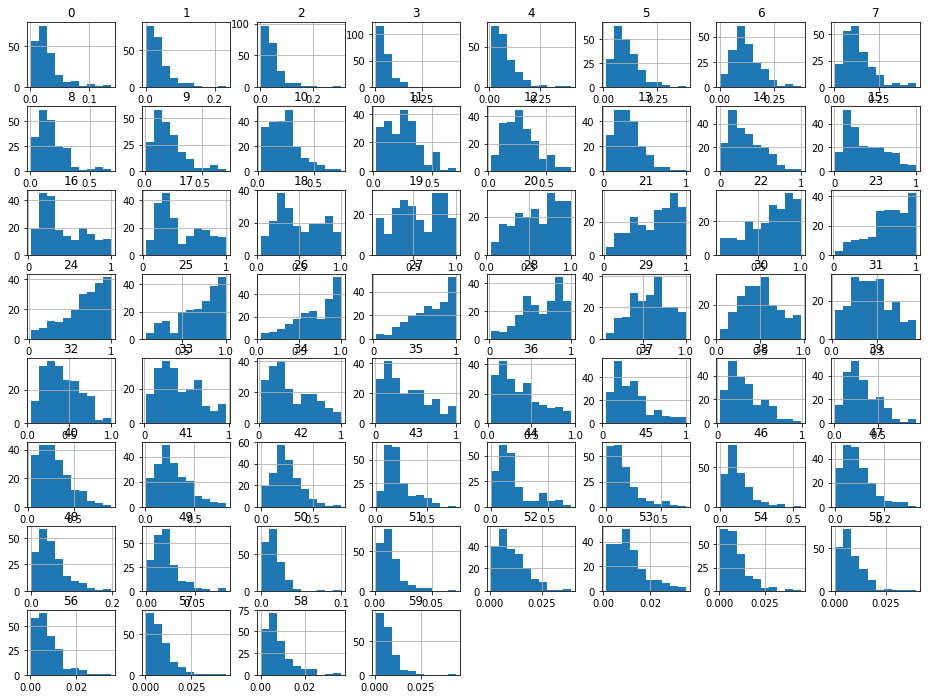

In [32]:
# Histograms for each attribute
dataset.hist()
pyplot.show()

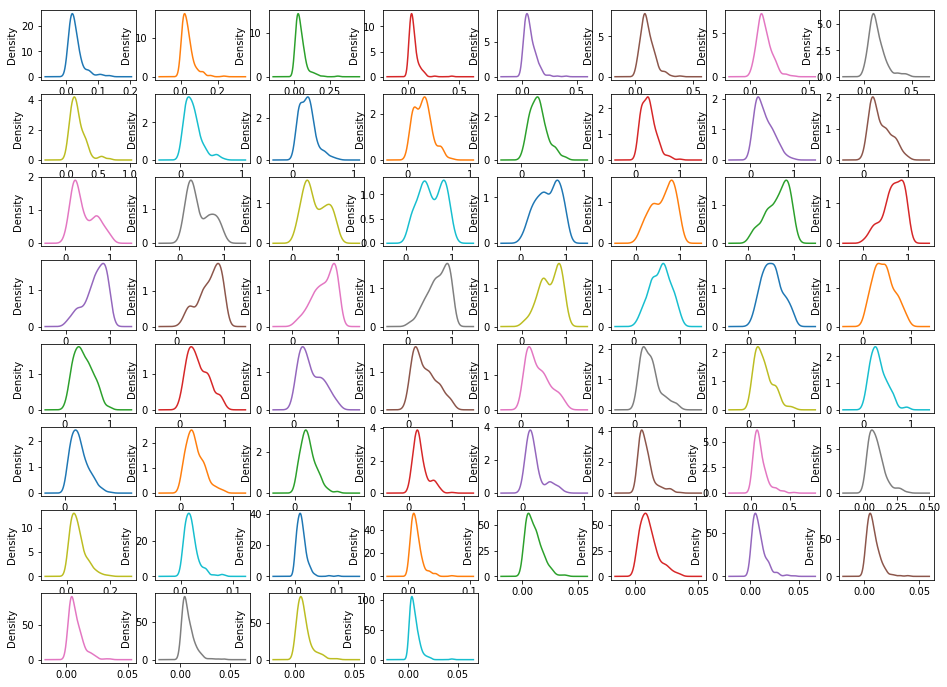

In [33]:
# Density plot for each attribute
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

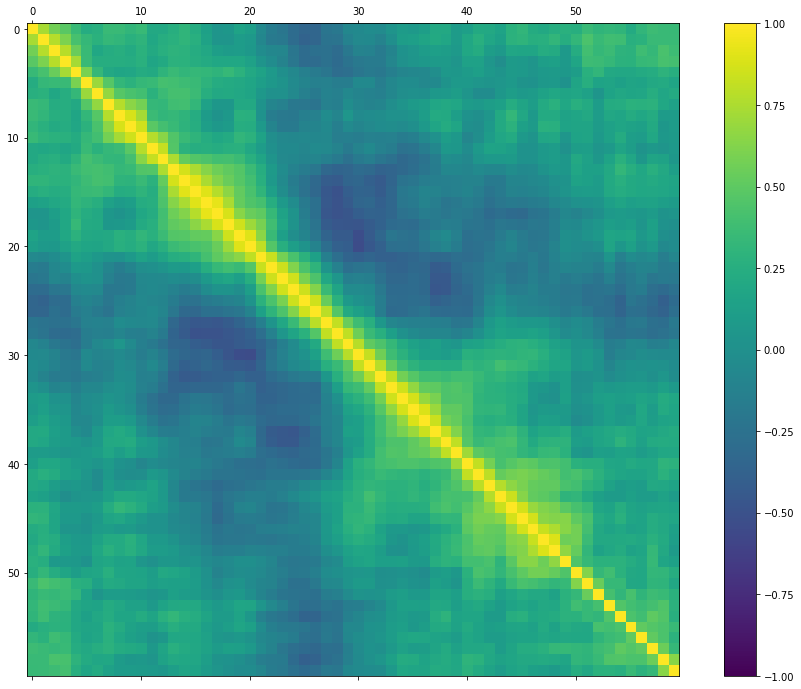

In [34]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

In [35]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### 3.a) Data Cleaning

### 3.b) Feature Selection

### 3.c) Data Transforms

## Section 4 - Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the dataset. The typical evaluation tasks include:

Defining test options such as cross validation and the evaluation metric to use.
Spot checking a suite of linear and nonlinear machine learning algorithms.
Comparing the estimated accuracy of algorithms.
For this project, we will evaluate 6 different algorithms:

* Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA)

* Nonliear Algorithms: Classification and Regression Trees (CART), Support Vector Machine (SVM), Gaussian Native Bayes (NB) and k-Nearest Neighbors (KNN)

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Evaluate Algorithms: Baseline

In [36]:
# Test options and evaluation metric
num_folds = 10
seed = 888
scoring = 'accuracy'

In [37]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

In [38]:
# Evaluate each model in turn
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.735294 (0.076785)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


The KNN model had the highest average accuracy, followed by LR. The KNN model is definitely worth further studying. However, there is one additional point worth considering.

In section 2, we observed the attributes all have quite different scales. Is it possible that standardizing the data might have positive effect on some algorithms, particularly those non-linear ones (NB and SVM)?

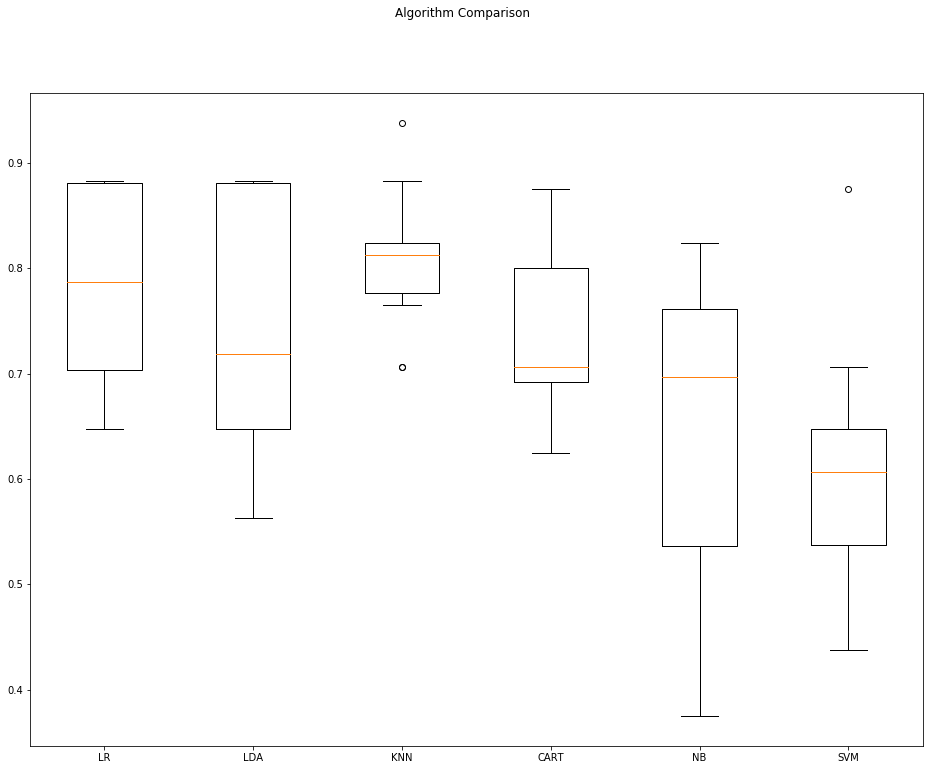

In [39]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 4.b) Evaluate Algorithms: Data Standardization

We had suspected that the differing scales of the training data might have an negative effect on the accuracy of the algorithms. In this section, we will evaluate the algorithms using a standardized dataset. Standardization means that the data get transformed such that each attribute has a mean value of zero and standard deviation of one.

In [40]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.740809 (0.113593)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


After the data standardization, we can see the SVM algorithm was actually doing the best.

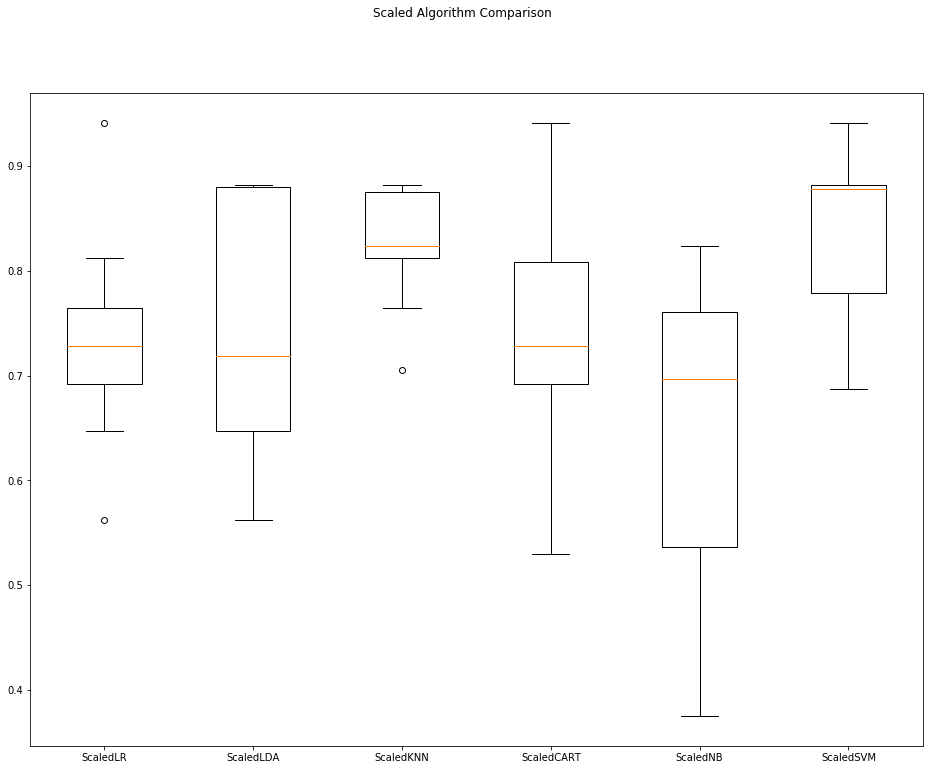

In [41]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models:

* Search for a combination of parameters for each algorithm that yields the best results.
* Combine the prediction of multiple models into an ensemble prediction using standalone algorithms or the caretEnsemble package.

For this project, we look at how tuning the KNN and SVM algorithms could be helpful for our final model. For future project, we will also look at the ensemble methods for optimizing the model.

### 5.a) Algorithm Tuning

The KNN algorithm appeared to yield the lowest error when the number of neighbors equals to 1.

In [42]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.710843 (0.078716) with: {'n_neighbors': 17}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.710843 (0.108829) with: {'n_neighbors': 21}


The SVM algorithm appeared to yield the lowest error when the tuning value of C equals to 1.5.

In [43]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'

### 5.b) Ensemble Methods
Another tuning approach is to leverage the ensemble models. In this section, we will evaluate our models using four ensemble machine learning algorithms.
* Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM)
* Bagging Methods: Random Forests (RF) and Extra Trees (ET)

In [44]:
# Set up ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
# Evaluate each model in turn
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.813971 (0.066017)
GBM: 0.841544 (0.114000)
RF: 0.758088 (0.124413)
ET: 0.752941 (0.085462)


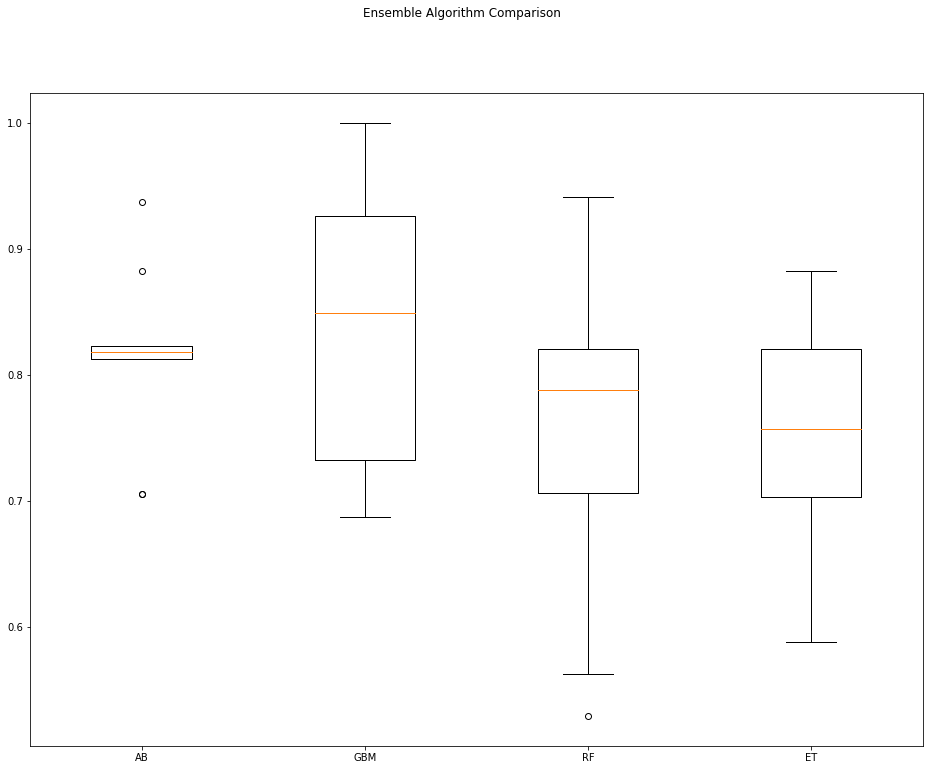

In [45]:
# Compare ensemble algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

For this dataset, the SVM algorithm appears to yield the best results overall. We will prepare the final model by training it with the entire training dataset and apply the same data transformation to the validation dataset.
### 6.a) Predictions on validation dataset

In [46]:
# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# Transform the validation dataset and predict
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.857142857143
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42

